Import necessary packages

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Code to Generate Figure 4

Load the cosine similarity data

In [19]:
# Path where the Excel file ("average_cosine_similarity_results.xlsx") is saved
input_path = os.path.join(os.path.expanduser("~"), "Desktop", "average_cosine_similarity_results.xlsx")

# Load this data back into a DataFrame
averaged_df = pd.read_excel(input_path)

Generate side-by-side KDE plots (Figure 4)

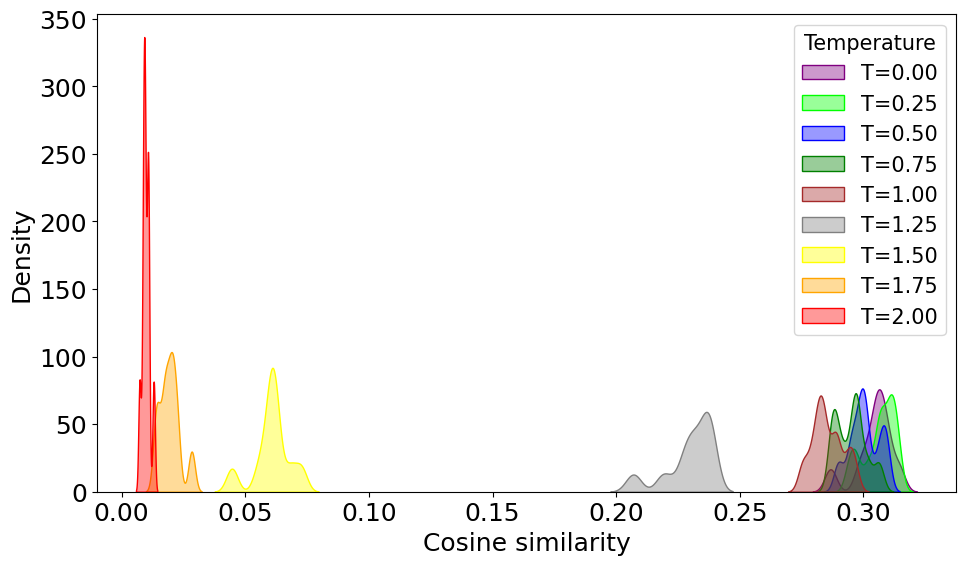

In [22]:
# Set font sizes to match LaTeX
plt.rcParams.update({
    "font.size": 18,
    "axes.titlesize": 18,
    "axes.labelsize": 18,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.fontsize": 18,       
    "legend.title_fontsize": 18
})

# Define the 9 temperatures
selected_temperatures = [0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00]

# Create a single figure
plt.figure(figsize=(10, 6))

# Custom color mapping as per Linh’s suggestions
custom_colors = [
    "purple",      # T = 0
    "lime",        # T = 0.25
    "blue",        # T = 0.5
    "green",       # T = 0.75
    "brown",        # T = 1
    "gray",        # T = 1.25
    "yellow",      # T = 1.5
    "orange",      # T = 1.75
    "red"          # T = 2
]

for i, temp in enumerate(selected_temperatures):
    temp_df = averaged_df[averaged_df['temperature'] == temp]

    if len(temp_df) >= 2:
        sns.kdeplot(
            data=temp_df,
            x='average_cosine_similarity',
            fill=True,
            bw_adjust=0.5,
            alpha=0.4,    # Slight transparency for overlapping areas
            label=f"T={temp:.2f}",
            color=custom_colors[i]  # <- use custom color
        )

plt.xlabel("Cosine similarity")
plt.ylabel("Density")
plt.legend(title="Temperature", loc='upper right', fontsize=15, title_fontsize=15)
plt.tight_layout()

# Save to Desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
file_path = os.path.join(desktop_path, "stacked_KDE_distributions.png")
plt.savefig(file_path, dpi=300, bbox_inches='tight')

plt.show()

## Code to Generate Figure 2D

Load the data: Wasserstein distance from reference point

In [31]:
# Path where the Excel file ("wasserstein_distance_reference_point.xlsx") is saved
input_path = os.path.join(os.path.expanduser("~"), "Desktop", "wasserstein_distance_reference_point.xlsx")

# Load this data back into a DataFrame
reference_point_df = pd.read_excel(input_path)

Generate figure: Wasserstein distance from reference point (Figure 2D)

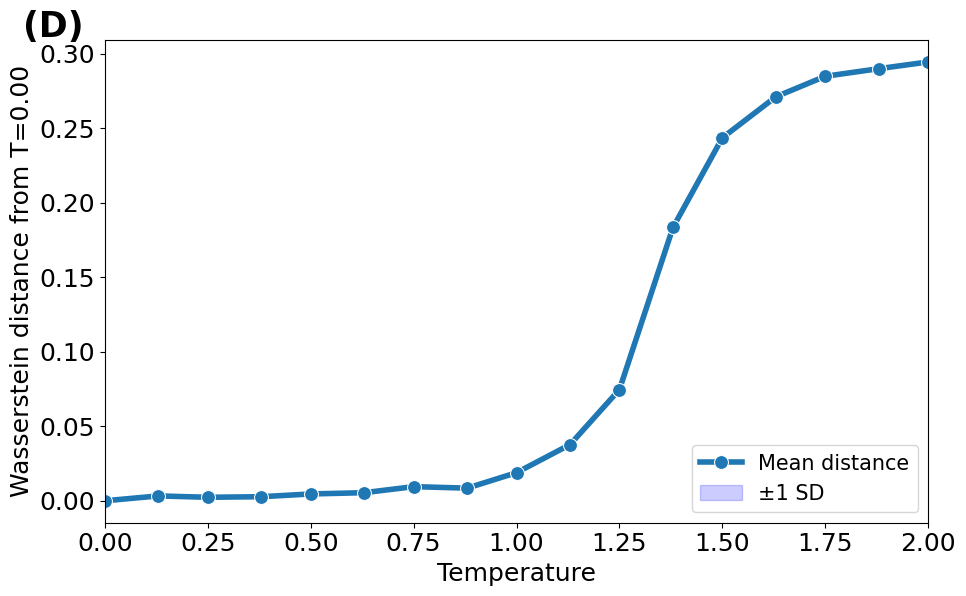

In [38]:
# Set font sizes to match LaTeX
plt.rcParams.update({
    "font.size": 18,
    "lines.linewidth": 4,
    "lines.markersize": 10,
    "axes.titlesize": 18,
    "axes.labelsize": 18,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.fontsize": 15,       
    "legend.title_fontsize": 15
})

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='temperature', y='mean_distance', data=reference_point_df, marker='o', label='Mean distance')
plt.fill_between(reference_point_df['temperature'],
                 reference_point_df['mean_distance'] - reference_point_df['std_distance'],
                 reference_point_df['mean_distance'] + reference_point_df['std_distance'],
                 color='blue', alpha=0.2, label='±1 SD')

# plt.title(f"Average Wasserstein Distance from T={reference_temp:.2f} Across All Flitzes")
plt.xlabel("Temperature")
plt.ylabel("Wasserstein distance from T=0.00")
plt.grid(False)
plt.legend(loc = 'lower right')
plt.xlim(0.0, 2.0)
plt.tight_layout()
fig = plt.gcf()  # Get current figure
fig.text(0.04, 0.96, "(D)", fontsize=25, fontweight='bold')  # Adjust for "(B)" if needed

# Define the path to your desktop (cross-platform)
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
file_path = os.path.join(desktop_path, "wasserstein_distance_reference_point.png")
plt.savefig(file_path, dpi=300)

plt.show()

## Code to Generate Figure 2C

Load the data: Wasserstein distance between consecutive temperature values

In [49]:
# Path where the Excel file ("wasserstein_distance_consecutive_temps.xlsx") is saved
input_path = os.path.join(os.path.expanduser("~"), "Desktop", "wasserstein_distance_consecutive_temps.xlsx")

# Load this data back into a DataFrame
consecutive_temps_df = pd.read_excel(input_path)

Generate figure: Wasserstein distance between consecutive temps (Figure 2C)

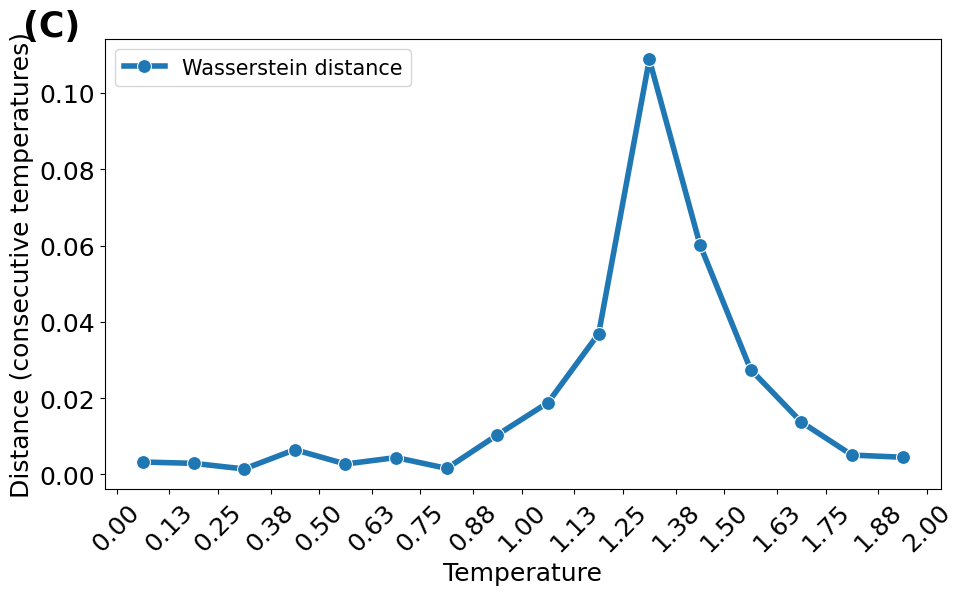

In [54]:
# Sort the temperature values
temperatures = sorted(averaged_df['temperature'].unique())

# Set font sizes to match LaTeX
plt.rcParams.update({
    "font.size": 18,
    "lines.linewidth": 4,
    "lines.markersize": 10,
    "axes.titlesize": 18,
    "axes.labelsize": 18,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.fontsize": 15,       
    "legend.title_fontsize": 15
})

plt.figure(figsize=(10, 6))
sns.lineplot(x='temperature_midpoint', y='wasserstein_distance', data=consecutive_temps_df, marker='o', label='Wasserstein distance')

# Add x-axis ticks for all temperature values for reference
plt.xticks(temperatures, rotation=45)
plt.grid(False)
plt.xlabel("Temperature")
plt.ylabel("Distance (consecutive temperatures)")
plt.tight_layout()
fig = plt.gcf()  # Get current figure
fig.text(0.04, 0.96, "(C)", fontsize=25, fontweight = "bold")  # Adjust for "(B)" if needed

# Define the path to your desktop (cross-platform)
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
file_path = os.path.join(desktop_path, "wasserstein_distance_consecutive.png")
plt.savefig(file_path, dpi=300)

plt.show()